In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
from skimage.metrics import structural_similarity, mean_squared_error

In [2]:
def diff_image(img1, img2):
    (ssim, diff) = structural_similarity(img1, img2, full = True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}".format(ssim))

    mse = mean_squared_error(img1, img2)
    print("MSE: {}".format(mse))

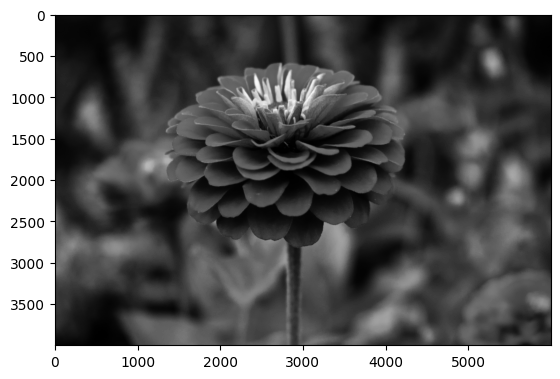

In [3]:
image = cv2.imread("img.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

Создание шума Гуауса

In [4]:
def create_gaussian_noise(image_gray):
    mean = 0
    stddev = 100
    noise_gauss = np.zeros(image_gray.shape, np.uint8)
    cv2.randn(noise_gauss, mean, stddev)
    return noise_gauss

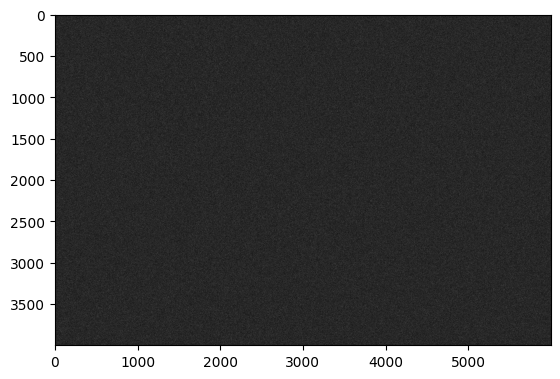

In [5]:
gaussian_noise = create_gaussian_noise(image_gray)
plt.imshow(gaussian_noise, cmap="gray")

Наложение шума Гауса

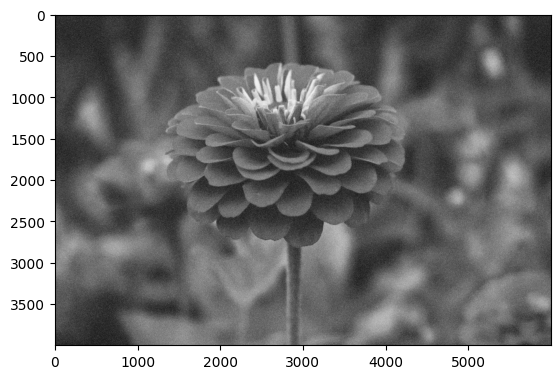

In [6]:
image_gaussian_noise = cv2.add(image_gray, gaussian_noise)
plt.imshow(image_gaussian_noise, cmap="gray")

In [7]:
diff_image(image_gray, image_gaussian_noise)

SSIM: 0.025890101157439064
MSE: 4498.495616958333


Создание шума "соль-перец"

In [8]:
def add_sp_noise(image_gray):
    noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
    zeros_pixel = np.where(noise == 0)
    ones_pixel = np.where(noise == 100)
    
    image_sp = copy.deepcopy(image_gray)
    image_sp[zeros_pixel] = 0
    image_sp[ones_pixel] = 255
    return image_sp

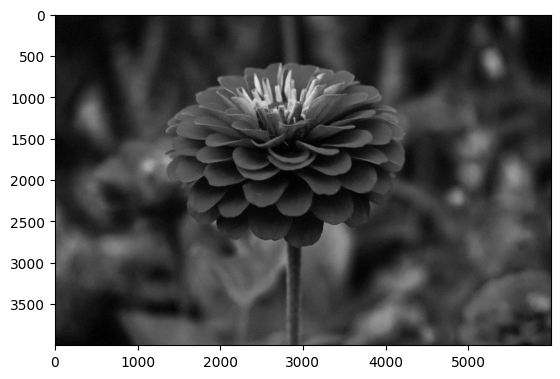

In [9]:
image_sp = add_sp_noise(image_gray)
plt.imshow(image_sp, cmap="gray")

In [10]:
diff_image(image_gray, image_sp)

SSIM: 0.5498124900749662
MSE: 444.943939625


Тесты фильтров на Гаусовом шуме

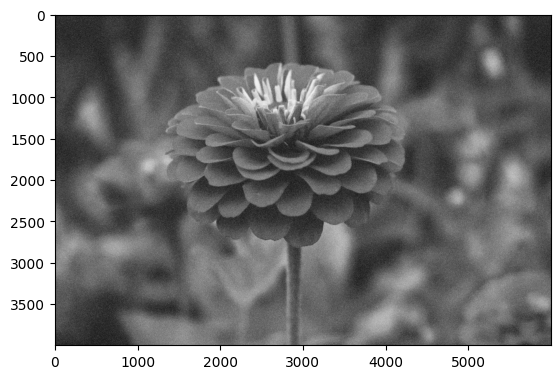

In [11]:
image_gaussian_noise_median = cv2.medianBlur(image_gaussian_noise, 3)
plt.imshow(image_gaussian_noise, cmap="gray")

In [12]:
diff_image(image_gray, image_gaussian_noise_median)

SSIM: 0.15361941488749958
MSE: 844.0684315833333


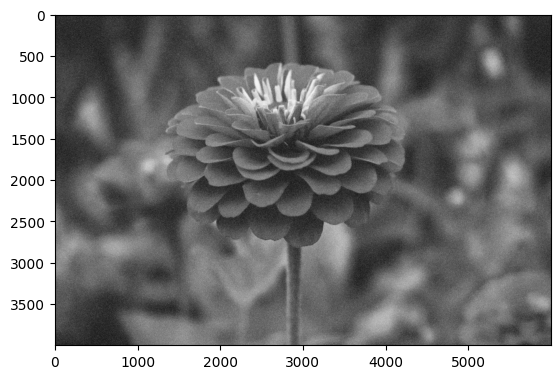

In [13]:
image_gaussian_noise_gauss = cv2.GaussianBlur(image_gaussian_noise,(5,5),0)
plt.imshow(image_gaussian_noise_gauss, cmap="gray")

In [14]:
diff_image(image_gray, image_gaussian_noise_gauss)

SSIM: 0.2304045520784349
MSE: 1729.2054128333334


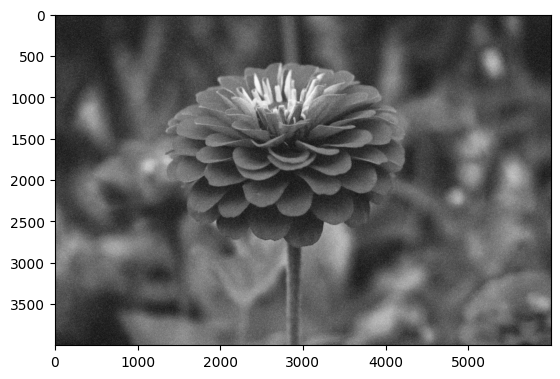

In [15]:
image_gauss_bilat = cv2.bilateralFilter(image_gaussian_noise,9,75,75)
plt.imshow(image_gauss_bilat, cmap="gray")

In [16]:
diff_image(image_gray, image_gauss_bilat)

SSIM: 0.10450695775045171
MSE: 1786.3902955


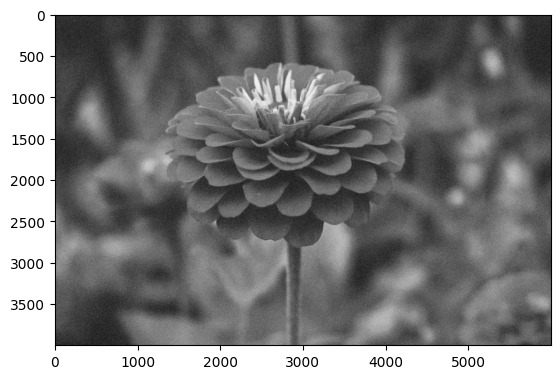

In [17]:
image_gauss_nlm_1 = cv2.fastNlMeansDenoising(image_gaussian_noise, h = 20)
plt.imshow(image_gauss_nlm_1, cmap="gray")

In [18]:
diff_image(image_gray, image_gauss_nlm_1)

SSIM: 0.02893100217642121
MSE: 4486.269640875


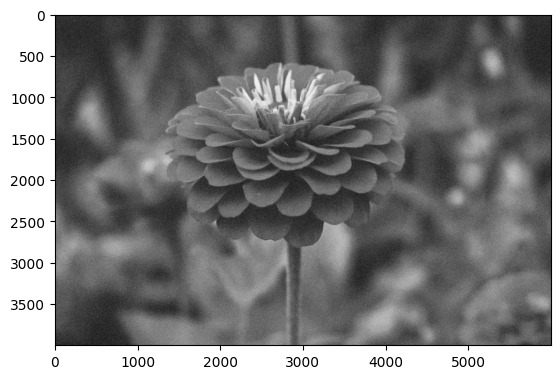

In [19]:
image_gauss_nlm_2 = cv2.fastNlMeansDenoising(image_gaussian_noise, h = 20)
plt.imshow(image_gauss_nlm_2, cmap="gray")

In [20]:
diff_image(image_gray, image_gauss_nlm_2)

SSIM: 0.02893100217642121
MSE: 4486.269640875


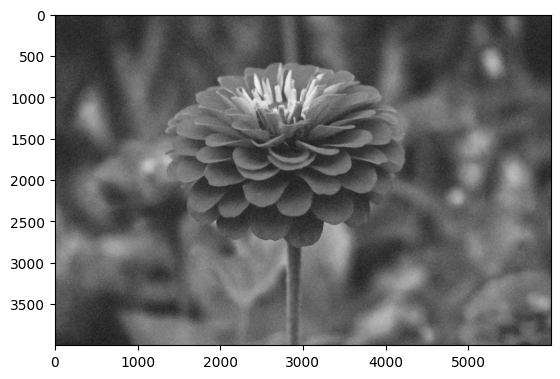

In [21]:
image_gauss_nlm_3 = cv2.fastNlMeansDenoising(image_gaussian_noise, h = 30)
plt.imshow(image_gauss_nlm_3, cmap="gray")

In [22]:
diff_image(image_gray, image_gauss_nlm_3)

SSIM: 0.0833390685587876
MSE: 2778.293724375


Тесты фильтров на шуме "Соль-перец"

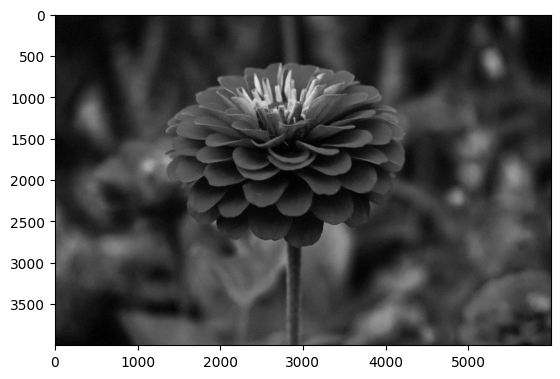

In [23]:
image_sp_median = cv2.medianBlur(image_sp, 3)
plt.imshow(image_sp, cmap="gray")

In [24]:
diff_image(image_gray, image_sp_median)

SSIM: 0.9115760119485659
MSE: 7.711628416666667


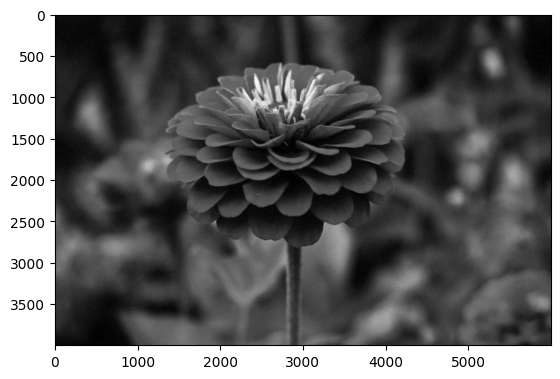

In [25]:
image_sp_gauss = cv2.GaussianBlur(image_sp,(5,5),0)
plt.imshow(image_sp_gauss, cmap="gray")

In [26]:
diff_image(image_gray, image_sp_gauss)

SSIM: 0.7129206086224831
MSE: 43.246730125


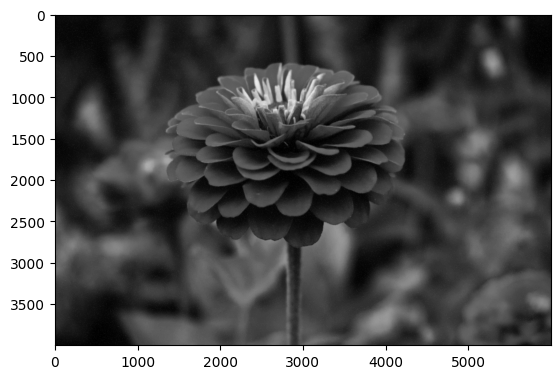

In [27]:
image_sp_bilat = cv2.bilateralFilter(image_sp,9,75,75)
plt.imshow(image_sp_bilat, cmap="gray")

In [28]:
diff_image(image_gray, image_sp_bilat)

SSIM: 0.6297328655383702
MSE: 171.39960275


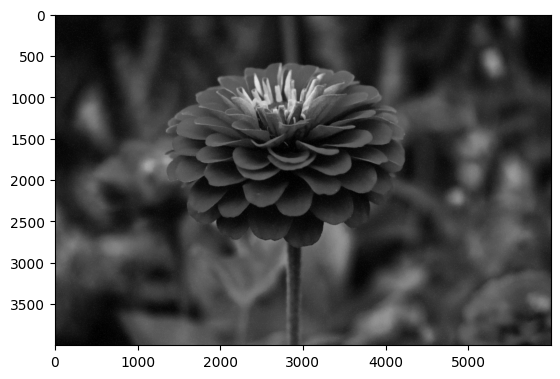

In [29]:
image_sp_nlm_1 = cv2.fastNlMeansDenoising(image_sp, h = 10)
plt.imshow(image_sp_nlm_1, cmap="gray")

In [30]:
diff_image(image_gray, image_sp_nlm_1)

SSIM: 0.5546255635474238
MSE: 419.25354220833333


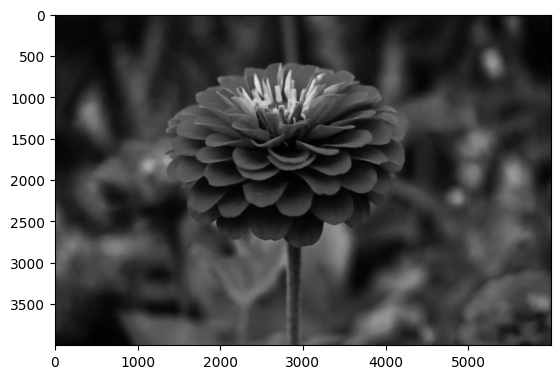

In [31]:
image_sp_nlm_2 = cv2.fastNlMeansDenoising(image_sp, h = 20)
plt.imshow(image_sp_nlm_2, cmap="gray")

In [32]:
diff_image(image_gray, image_sp_nlm_2)

SSIM: 0.7509379597453365
MSE: 64.41969404166667


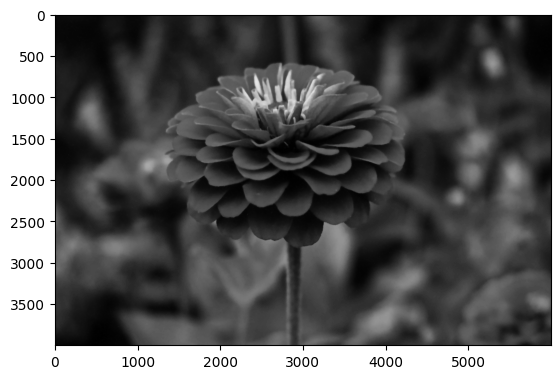

In [33]:
image_sp_nlm_3 = cv2.fastNlMeansDenoising(image_sp, h = 30)
plt.imshow(image_sp_nlm_3, cmap="gray")

In [34]:
diff_image(image_gray, image_sp_nlm_3)

SSIM: 0.837352982603098
MSE: 15.571681
